# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df_bike = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/yulu_rental.csv')
df_bike['datetime'] = pd.to_datetime(df_bike['datetime'])
df_bike.set_index('datetime', inplace=True)

# Додаткові колонки
df_bike['month'] = df_bike.index.month
df_bike['hour'] = df_bike.index.hour
df_bike['weekday'] = df_bike.index.day_name()
df_bike['weekday_num'] = df_bike.index.weekday
df_bike['week'] = df_bike.index.isocalendar().week
df_bike['year'] = df_bike.index.year
df_bike['day'] = df_bike.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [4]:
month_mean_bike = df_bike['count'].resample('ME').mean()

In [5]:
month_mean_bike.head().round(2)

,count
datetime,
2011-01-31,54.65
2011-02-28,73.64
2011-03-31,86.85
2011-04-30,111.03
2011-05-31,174.81


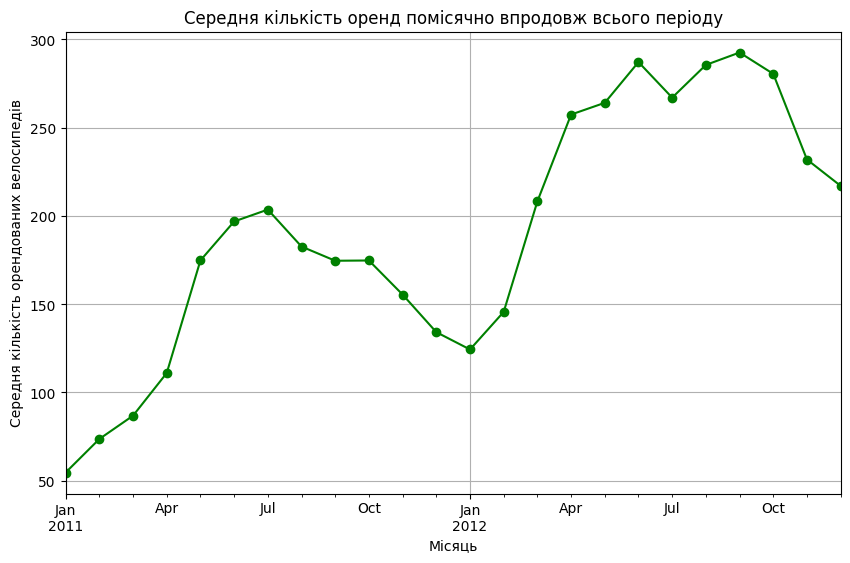

In [6]:
month_mean_bike.plot(
    marker='o',
    figsize=(10, 6),
    title='Cередня кількість оренд помісячно впродовж всього періоду',
    xlabel='Місяць',
    ylabel='Cередня кількість орендованих велосипедів',
    grid=True,
    color = 'green'

);

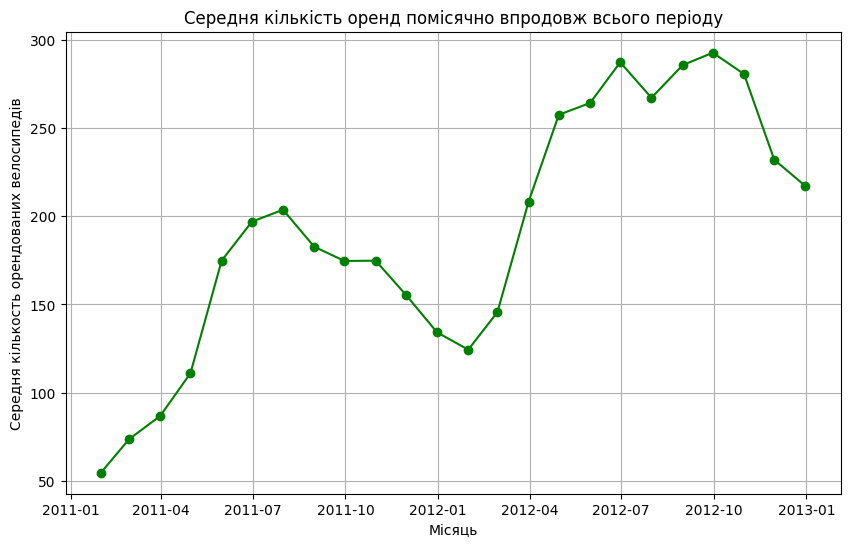

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(month_mean_bike, 'o-g')
plt.title('Cередня кількість оренд помісячно впродовж всього періоду')
plt.xlabel('Місяць')
plt.ylabel('Cередня кількость орендованих велосипедів')
plt.grid(True);

В plot початок графіку починается з самого початку сітки і вісь х відображається, як назва місяця, що дуже зручно, якщо дані максимум за один рік. В matplotlib початок кривої йде зі зміщенням на один місяць, що може бути критичним, якщо інтерпретувати дані лише по графіку, також в цій візуалізації інше відображення осі х, більш зручне, якщо крива відображає декілька років.

Вважаю, що візуалізації більш - менш однакові і вибирати треба по доцільності інформації, але для мене зміщення на 1 одиницю даних в matplotlib є критичним, т.я. це треба весь час тримати в голові

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [9]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

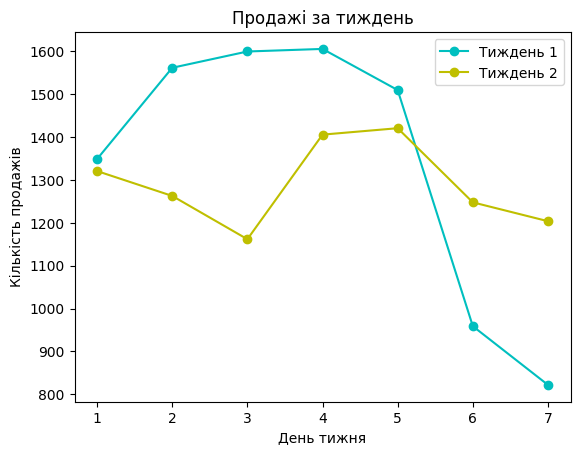

In [10]:
plt.plot(days, sales_week1, 'o-c', label='Тиждень 1') #колір голубий
plt.plot(days, sales_week2, 'o-y', label='Тиждень 2')
plt.title('Продажі за тиждень')
plt.xlabel('День тижня')
plt.ylabel('Кількість продажів')
#plt.grid (True) не сподобалась)))
plt.legend();

### **відповіді**
1. Більш стабільніші продажі були в другий тиждень. В перший тиждень в кінці тижня на вихідних (субота, неділя) був провал в продажах.

In [11]:
mean_sales_week1 = np.mean(sales_week1)
mean_sales_week2 = np.mean(sales_week2)

In [12]:
print ('Середнє: \n', round(mean_sales_week1,2) ,'\n', round (mean_sales_week2, 2) )

Середнє: 
 1344.0 
 1289.29


In [13]:
std_sales_week1 = np.std(sales_week1)
std_sales_week2 = np.std(sales_week2)

In [14]:
print ('Відхилення: \n', round(std_sales_week1,2) ,'\n', round (std_sales_week2, 2) )

Відхилення: 
 300.0 
 90.91


2. Після розрахунків середнього і стандартного відхилення теж можна сказати, що більш стабільні продажі були в другий тиждень, т.я. стандартне відхилення - 90.91(це говорить про більш стабільні продажі), в той час як на першому тижні 300. При цьому середне на другому тижні трохи менше, але...

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

In [17]:
mean_temp = df_bike.groupby('month')['temp'].mean()

In [18]:
mean_temp.round(2)

,temp
month,
1,9.84
2,11.80
3,15.90
4,18.72
5,22.67
6,27.06
7,30.84
8,29.74
9,25.78


In [19]:
mean_bike_season = df_bike.groupby('season')['count'].mean()

In [20]:
mean_bike_season.head().round(2)

,count
season,
1,116.34
2,215.25
3,234.42
4,198.99


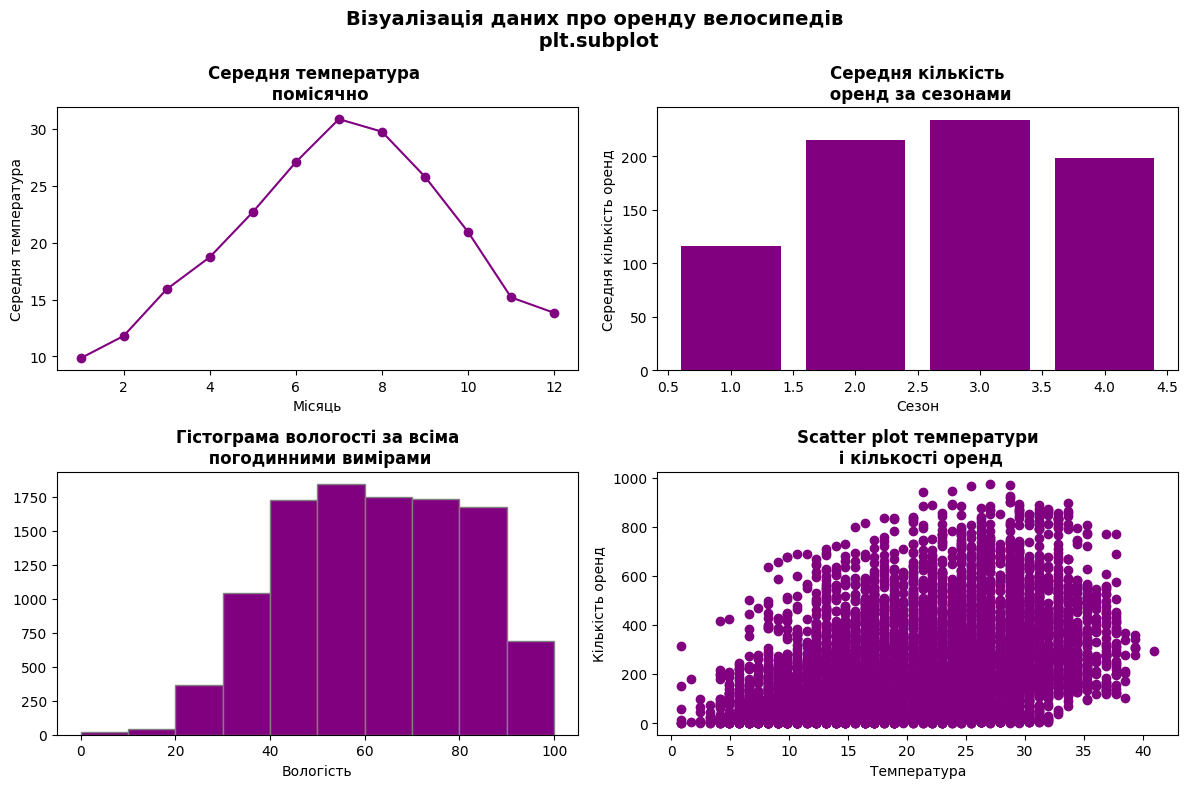

In [24]:
plt.figure(figsize=(12,8))
plt.suptitle('Візуалізація даних про оренду велосипедів\n plt.subplot' , fontsize=14, fontweight='bold')

plt.subplot(2,2,1)
plt.plot(mean_temp, 'o-', color = 'purple')
plt.title('Середня температура \n помісячно', fontweight='bold')
plt.xlabel('Місяць')
plt.ylabel('Середня температура');

plt.subplot(2,2,2)
plt.bar(mean_bike_season.index, mean_bike_season, color = 'purple')
plt.title('Середня кількість\n оренд за сезонами', fontweight='bold')
plt.ylabel('Середня кількість оренд')
plt.xlabel('Сезон')

plt.subplot(2,2,3)
plt.hist(df_bike['humidity'], bins=10, edgecolor = 'gray', color = 'purple')
plt.title('Гістограма вологості за всіма\n погодинними вимірами', fontweight='bold')
plt.xlabel('Вологість')

plt.subplot(2,2,4)
plt.scatter(df_bike['temp'], df_bike['count'],  color = 'purple')
plt.title('Scatter plot температури\n і кількості оренд', fontweight='bold')
plt.xlabel('Температура')
plt.ylabel('Кількість оренд')
plt.tight_layout();

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

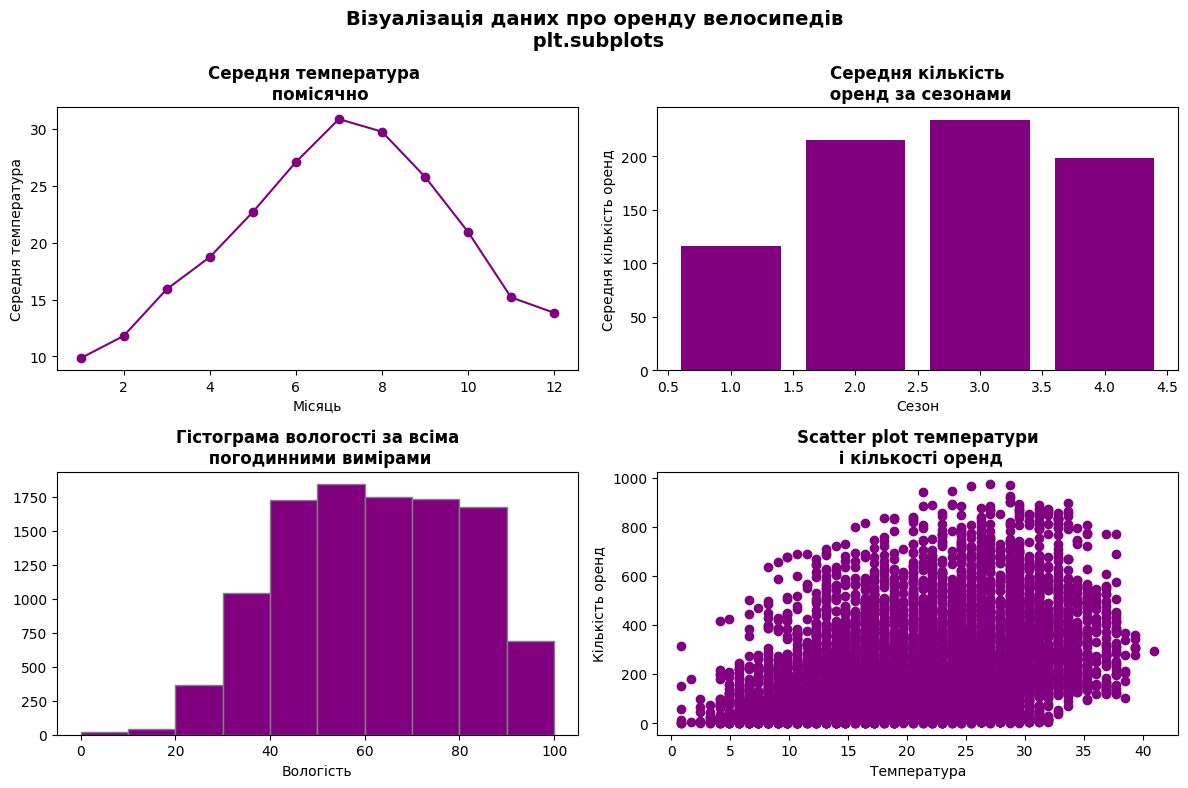

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].plot(mean_temp, 'o-', color='purple')
ax[0, 0].set_title('Середня температура \n помісячно', fontweight='bold')
ax[0, 0].set_xlabel('Місяць')
ax[0, 0].set_ylabel('Середня температура')

ax[0, 1].bar(mean_bike_season.index, mean_bike_season, color = 'purple')
ax[0, 1].set_title('Середня кількість\n оренд за сезонами', fontweight='bold')
ax[0, 1].set_xlabel('Сезон')
ax[0, 1].set_ylabel('Середня кількість оренд')

ax[1, 0].hist(df_bike['humidity'], bins=10, edgecolor = 'gray', color = 'purple')
ax[1, 0].set_title('Гістограма вологості за всіма\n погодинними вимірами', fontweight='bold')
ax[1, 0].set_xlabel('Вологість')

ax[1, 1].scatter(df_bike['temp'], df_bike['count'],  color = 'purple')
ax[1, 1].set_title('Scatter plot температури\n і кількості оренд', fontweight='bold')
ax[1, 1].set_xlabel('Температура')
ax[1, 1].set_ylabel('Кількість оренд')

# Загальний вигляд
fig.suptitle('Візуалізація даних про оренду велосипедів\n plt.subplots', fontsize=14, fontweight='bold')
plt.tight_layout();


З ptl.subplots трохи зручніше працювати, так як зпочатку прописуеш фігуру і потім явно задаєш її коордінати, в ptl.subplot треба весь час пам'ятати до якого графіка, що належить. В іншому і там і там треба прописувати всі налаштування, але вони більш зрозумілі в ptl.subplots, так як одразу видно до якого графіка вони належать

## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

In [26]:
monthly_stats = df_bike['count'].resample('ME').agg(['mean', 'max', 'min'])
monthly_stats.head(2)

,mean,max,min
datetime,,,
2011-01-31,54.645012,219,1
2011-02-28,73.641256,327,1


In [ ]:
import matplotlib.dates as mdates

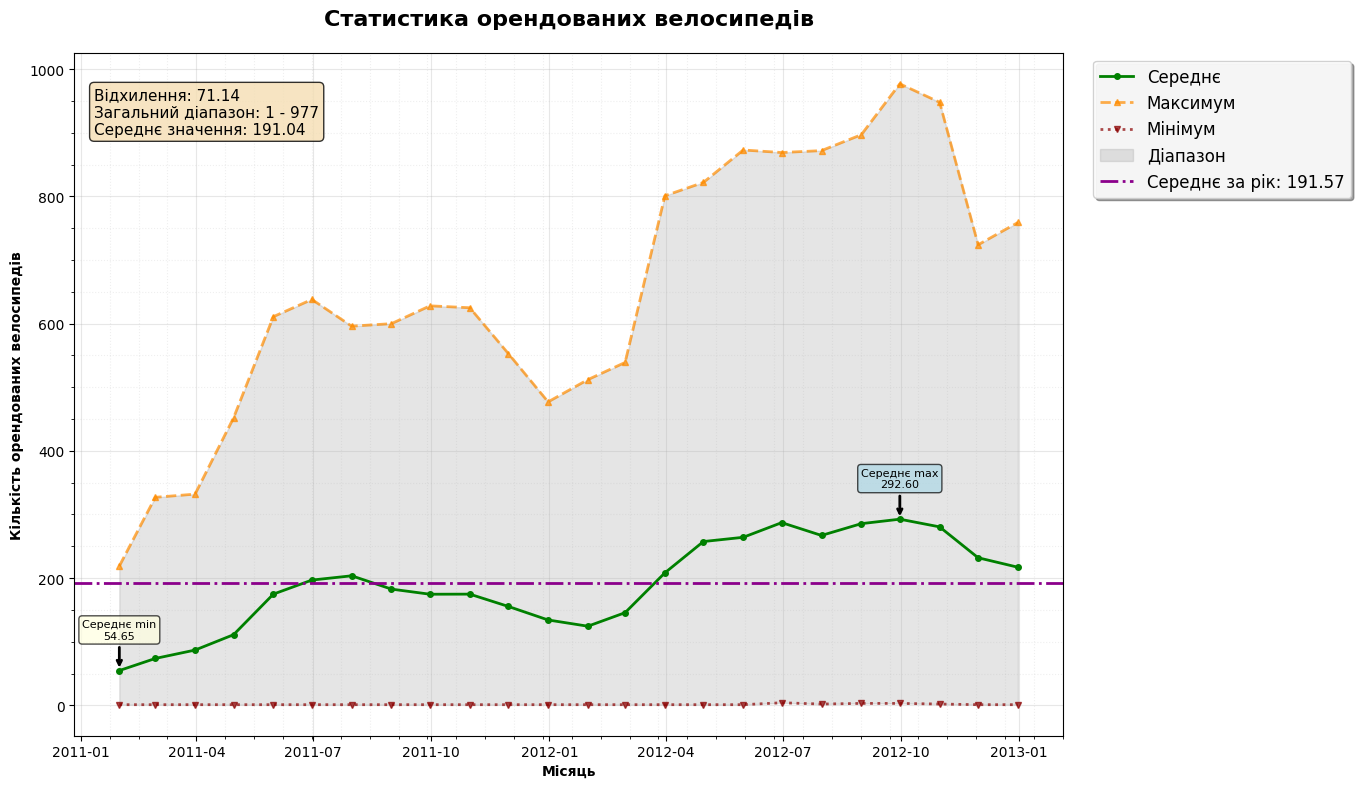

In [58]:
fig, ax = plt.subplots(figsize=(14, 8))

# Лінії з mean, min, max
ax.plot(monthly_stats.index, monthly_stats['mean'], 'g-o', linewidth=2,
        label='Середнє', markersize=4)
ax.plot(monthly_stats.index, monthly_stats['max'], '--^', linewidth=2,
        color = "darkorange", label='Максимум', markersize=4, alpha=0.7)
ax.plot(monthly_stats.index, monthly_stats['min'], ':v', linewidth=2,
        color = "darkred", label='Мінімум', markersize=4, alpha=0.7)

# Заповнення між max та min
ax.fill_between(monthly_stats.index, monthly_stats['min'], monthly_stats['max'],
                alpha=0.2, color='gray', label='Діапазон')

# анотації для max, min
max_idx = monthly_stats['mean'].idxmax()
min_idx = monthly_stats['mean'].idxmin()
max_val = monthly_stats['mean'].max()
min_val = monthly_stats['mean'].min()
ax.annotate(f'Середнє max\n{max_val:.2f}',
            xy=(max_idx, max_val), xytext=(max_idx, max_val + 50),
            arrowprops=dict(arrowstyle='->', color='black', lw=2),
            fontsize=8, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.7))
ax.annotate(f'Середнє min\n{min_val:.2f}',
            xy=(min_idx, min_val), xytext=(min_idx, min_val + 50),
            arrowprops=dict(arrowstyle='->', color='black', lw=2),
            fontsize=8, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='lightyellow', alpha=0.7))

# Cереднє за весь період
mean_period = df_bike['count'].mean()
ax.axhline(y=mean_period, color='darkmagenta', linestyle='-.', linewidth=2,
           label=f'Середнє за рік: {mean_period:.2f}')

# Додаємо сітку з різними стилями
ax.grid(True, which='major', linestyle='-', alpha=0.3)
ax.grid(True, which='minor', linestyle=':', alpha=0.2)
ax.minorticks_on()


# Покращуємо легенду
ax.legend(loc='upper right', fontsize=12, frameon=True, shadow=True,
          fancybox=True, framealpha=0.9, bbox_to_anchor=(1.3, 1))
# здвинула легенду, т.я. вона перекривала "пік" і це могло унеможливлювати робити висновки по графіку

# Додатковою статистикою
textstr = f'Відхилення: {(monthly_stats["mean"] ).std():.02f}\n'
textstr += f'Загальний діапазон: {monthly_stats["min"].min():.0f} - {monthly_stats["max"].max():.0f}\n'
textstr += f'Середнє значення: {monthly_stats["mean"].mean():.2f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.02, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

# Опис осей
ax.set_xlabel('Місяць', fontsize=10, fontweight='bold')
ax.set_ylabel('Кількість орендованих велосипедів', fontsize=10, fontweight='bold')
ax.set_title('Статистика орендованих велосипедів',
             fontsize=16, fontweight='bold', pad=20)

plt.tight_layout();

1. З анотаціями графік стає більш інформативним, одразу зрозуміле max/min значення, або інша інформація, яку додав аналітик
2. fill_between () використовується для заповлення інтервалу кольором, наприклад між лініями max i min значень

3. текстовий блок дає розуміння основних показників і при правильному виведені дає можливість приймати поверхневі рішення без більш детального вивчення датасету